In [1]:
import numpy as np
import pandas as pd

## Creation of R matrix (User-Item rating matrix)

In [2]:
x = np.array([[5,0,4,0,3,3],
            [0,4,0,0,3,0],
            [3,0,0,3,0,0],
            [0,4,0,5,0,1]])

In [3]:
Data = pd.DataFrame(data=x, index=[1,2,3,4], columns=[1,2,3,4,5,6])
Data

,1,2,3,4,5,6
1,5,0,4,0,3,3
2,0,4,0,0,3,0
3,3,0,0,3,0,0
4,0,4,0,5,0,1


In [4]:
R = np.asmatrix(x)
R

matrix([[5, 0, 4, 0, 3, 3],
        [0, 4, 0, 0, 3, 0],
        [3, 0, 0, 3, 0, 0],
        [0, 4, 0, 5, 0, 1]])

In [5]:
R_arr = np.array(R)

## Initialization of f i.e. low rank

## U is No of users in User-Item rating matrix
## I is No of items User-Item rating matrix

In [6]:
U,I = R.shape
f = 3

## Factor matrices initialization randomly

In [7]:
#p = np.random.rand(U,f)
#q = np.random.rand(f,I)
p = np.array([[0.11,0.07,0.19],
            [0.09,0.16,0.19],
            [0.09,0.05,0.04],
            [0.03,0.13,0.18]])
q = np.array([[0.16,0.01,0.07,0.17,0.02,0.20],
             [0.18,0.19,0.10,0.05,0.18,0.15],
             [0.02,0.18,0.03,0.14,0.17,0.06]])

In [8]:
P = np.asmatrix(p)
Q = np.asmatrix(q)

In [9]:
pd.DataFrame(data=P, index=[1,2,3,4], columns=[1,2,3])

,1,2,3
1,0.11,0.07,0.19
2,0.09,0.16,0.19
3,0.09,0.05,0.04
4,0.03,0.13,0.18


In [10]:
pd.DataFrame(data=Q, index=[1,2,3], columns=[1,2,3,4,5,6])

,1,2,3,4,5,6
1,0.16,0.01,0.07,0.17,0.02,0.20
2,0.18,0.19,0.10,0.05,0.18,0.15
3,0.02,0.18,0.03,0.14,0.17,0.06


## Regularization Coefficient initialization

In [11]:
lambda_p = 0.06
lambda_q = 0.06

## Setting maximum training round

In [12]:
t = 1
max_training_round = 100

## Simple error measure (Sum of elementwise squared error)

In [13]:
def get_error(R, P, Q):
    return np.sum(np.square(R - np.dot(P,Q)))

## Auxiliary matrix to determine Ui and Iu

In [23]:
W = R>0.01
W[W == True] = 1
W[W == False] = 0
# To be consistent with our Q matrix
W = W.astype(np.int64, copy=False)

In [14]:
l2 = lambda x : np.sqrt(sum(x**2))

## Counting no of users who rated item i

In [24]:
Ui = []
for iterator in range(I):
    Ui.append(W[:,iterator].sum())

In [ ]:
R.T

In [28]:
Ui = l2(R_arr)

## Counting no of items which was being rated by user u

In [25]:
Iu = []
for iterator in range(U):
    Iu.append(W[iterator].sum())

In [29]:
Iu = l2(R_arr.T)

In [30]:
len(Ui)

6

In [31]:
len(Iu)

4

In [32]:
Ui

array([5.83095189, 5.65685425, 4.        , 5.83095189, 4.24264069,
       3.16227766])

In [33]:
Iu

array([7.68114575, 5.        , 4.24264069, 6.4807407 ])

## RSNMF

In [34]:
error = []
while t <= max_training_round:
    UserUp = np.zeros((U,f), dtype=float)
    UserDown = np.zeros((U,f), dtype=float)
    ItemUp = np.zeros((f,I), dtype=float)
    ItemDown = np.zeros((f,I), dtype=float)
    for u in range(U):
        for i in range(I):
            if(R[u,i] != 0):
                rui_cap = P[u,:]*Q[:,i]
                for k in range(f):
                    UserUp[u,k] = UserUp[u,k] + Q[k,i] * R[u,i]
                    UserDown[u,k] = UserDown[u,k] + Q[k,i] * rui_cap
                    ItemUp[k,i] = ItemUp[k,i] + P[u,k] * R[u,i]
                    ItemDown[k,i] = ItemDown[k,i] + P[u,k]*rui_cap
    for u in range(U):
        for k in range(f):
            UserDown[u,k] = UserDown[u,k] + Iu[u] * lambda_p * P[u,k]
            P[u,k] = P[u,k] * (UserUp[u,k]/UserDown[u,k])
    for i in range(I):
        for k in range(f):
            ItemDown[k,i] = ItemDown[k,i] + Ui[i] * lambda_q * Q[k,i]
            Q[k,i] = Q[k,i] * (ItemUp[k,i]/ItemDown[k,i])
    error.append(get_error(R, P, Q))
    #print('{}th epoch is completed'.format(t))
    t = t+1

## No of training epoch

In [35]:
print("No of training epoch : %d"%max_training_round)

No of training epoch : 100


## You could check the values by solving it by hand 

In [36]:
pd.DataFrame(data=P, index=[1,2,3,4], columns=[1,2,3])

,1,2,3
1,1.626711,1.287679,1.001976
2,0.332787,1.298760,1.513618
3,0.730927,0.814009,0.926897
4,0.200247,1.087277,1.808322


In [37]:
pd.DataFrame(data=Q, index=[1,2,3], columns=[1,2,3,4,5,6])

,1,2,3,4,5,6
1,1.381457,0.247884,1.161438,0.372386,0.447889,1.218432
2,1.159731,1.152045,0.924362,1.161127,0.960357,0.602987
3,1.009681,1.447950,0.745730,1.847967,0.976423,0.092706


In [38]:
rp = np.dot(P,Q)
R_estimated = pd.DataFrame(data=rp, index=[1,2,3,4], columns=[1,2,3,4,5,6])
R_estimated.head()

,1,2,3,4,5,6
1,4.752269,3.337511,3.826808,3.952542,2.943570,2.851379
2,3.494214,3.770365,2.715784,4.429065,2.874256,1.328934
3,2.889646,2.461060,2.292579,2.930229,2.014156,1.467350
4,3.363411,3.920590,2.586131,4.678755,2.899550,1.067244


In [39]:
print('Total error of rated movies: {}'.format(get_error(R,P,Q)))

Total error of rated movies: 111.97620181864559


## Error graph

In [40]:
import matplotlib.pyplot as plt

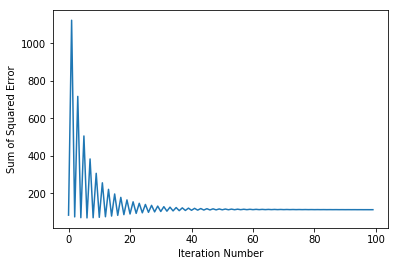

In [41]:
plt.plot(error);
plt.xlabel('Iteration Number');
plt.ylabel('Sum of Squared Error');

In [42]:
error

[82.72553034625035,
 1124.2342991137998,
 73.4677806731767,
 717.4042922837602,
 69.23019506545775,
 505.8826008266523,
 68.01974918875938,
 383.10351203143557,
 68.8869609706766,
 306.30489879655124,
 71.15168393389403,
 255.5951624126963,
 74.28866884524078,
 220.70637979181566,
 77.89620386462892,
 195.91129779436892,
 81.67685443636245,
 177.81976420437564,
 85.41994941632875,
 164.32854476068349,
 88.9847627537385,
 154.08194384142726,
 92.28493395603005,
 146.17771239058413,
 95.27474649951552,
 139.99872989824777,
 97.93761736330522,
 135.1127321862731,
 100.276859069846,
 131.21052405080263,
 102.3085582140849,
 128.06678495635092,
 104.05628983082494,
 125.51456728696984,
 105.54733975098351,
 123.4283251415851,
 106.81011241794805,
 121.71238821719385,
 107.8724364791765,
 120.29298727550429,
 108.76052779514367,
 119.112641784704,
 109.49841846118535,
 118.12614689796413,
 110.10770507518711,
 117.29766124312393,
 110.60750722494167,
 116.59856410840547,
 111.01455747395966,